# Fully Connected Neural Networks in TensorFlow's Keras


We will use dense neural networks in Keras to solve a simple regression problem. 

The dataset is a collection of simulated particle events from [Pythia](http://home.thep.lu.se/~torbjorn/Pythia.html). Specifically, we will construct a dense neural network which will learn how to calculate the invariant mass of a particle from its energy and momentum.

First, import `numpy`, `tensorflow`, and `pylab` and load the data.


In [1]:
import numpy as np
import tensorflow as tf
import pylab as plt

In [3]:
# load the data, which is stored as a numpy array data type
energy = np.load("../data/homogenous-16-particle-events-energy.npy")
print(energy.shape)

(35916, 80)


The dataset is a 2D array where each row represents one event of data from an electron-proton collision. This dataset is comprised _only_ of events where there were exactly 16 particles produced from an electron-proton collision. Each particle has an x-momentum, y-momentum, z-momentum, energy, and charge: $(p_x,p_y,p_z,E,q)$. Each event is therefore represented by 80 numbers. Using numpy's reshape method we can make each row represent one particle. 

In [4]:
# Here we rearrange the data within each of the events to isolate particles
energy = np.reshape(energy, (len(energy), 16, 5))
print(energy.shape)

energy = np.reshape(energy,(len(energy)* 16, 5))
print(energy.shape)


(35916, 16, 5)
(574656, 5)


These are our training data inputs, but we also must provide the targets, which are the invariant masses of each particle. This is a straightforward computation that does not require neural networks, but provides an easy-to-understand problem.

We choose units where $c = 1$:
$$m^2=E^2-||\textbf{p}||^2$$
where $m, E$, and $\textbf{p}$ are all in GeV.

In [5]:
# Complete me:
p2 = energy[:,0]**2 + energy[:,1]**2 + energy[:,2]**2
target = np.sqrt(np.maximum(energy[:, 3]**2 - p2, 0))  # the max is to protect against negative inputs to the sqrt,
                                                       # caused by floating point imprecision

print(target.shape)

(574656,)


There are several hundred thousand datapoints in this dataset which is overkill for this simple example. Create a test dataset with just 1000 examples.

In [6]:
#Slicing allows you select a subset of an array.
#This can be done like this: smallerArray = largerArray[:100]

smallEnergy = energy[:1000]
smallTarget = target[:1000]

print(smallEnergy.shape, smallTarget.shape)

(1000, 5) (1000,)


Next, make a histogram of the target data to make sure that we are seeing masses of real particles. As this data has limited precision, this will not resolve electrons very well, but protons, pions, and massless particles should be clearly visible.

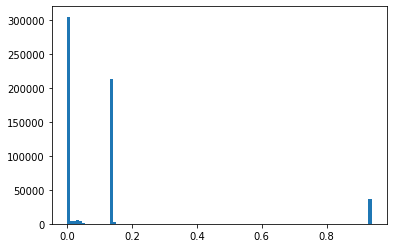

In [7]:
plt.hist(target,bins=100)
plt.show()

Now we can build and train the first neural network. Start with a simple one hidden layer network with 5 neurons, and ReLU activation. Train for 30 epochs with a batch size of 256, an Adam optimizer with a learning rate of 0.1, using mean squared error loss. 

Use a non-standard validation split of 0.8 when fitting to demonstrate overtraining. 

Information on how to implement these features can be found here:
<https://www.tensorflow.org/api_docs/python/tf/keras>.
Check out Sequential underneath models and Dense under layers.


In [8]:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(5, input_shape=(5,), activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(1))  # using automatic input shape inference here, and a linear activation function

model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(smallEnergy, smallTarget, epochs=30, batch_size=256, validation_split=0.8)

Epoch 1/30
1/1 [==============================] - 0s 137ms/step - loss: 3.4849 - val_loss: 2.6655
Epoch 2/30
1/1 [==============================] - 0s 31ms/step - loss: 1.6403 - val_loss: 3.1123
Epoch 3/30
1/1 [==============================] - 0s 33ms/step - loss: 1.6727 - val_loss: 1.5942
Epoch 4/30
1/1 [==============================] - 0s 32ms/step - loss: 0.5617 - val_loss: 0.7214
Epoch 5/30
1/1 [==============================] - 0s 25ms/step - loss: 0.5174 - val_loss: 0.6771
Epoch 6/30
1/1 [==============================] - 0s 28ms/step - loss: 1.0857 - val_loss: 0.6175
Epoch 7/30
1/1 [==============================] - 0s 26ms/step - loss: 1.0735 - val_loss: 0.4036
Epoch 8/30
1/1 [==============================] - 0s 27ms/step - loss: 0.5844 - val_loss: 0.3255
Epoch 9/30
1/1 [==============================] - 0s 25ms/step - loss: 0.2175 - val_loss: 0.4624
Epoch 10/30
1/1 [==============================] - 0s 26ms/step - loss: 0.1997 - val_loss: 0.6159
Epoch 11/30
1/1 [===========

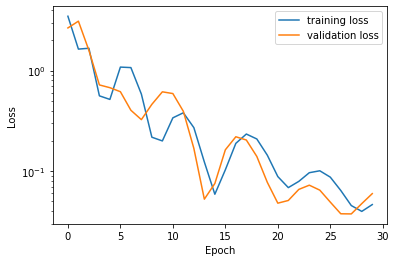

In [10]:
def plot_learning_curve(history):
    """ Function that accepts the result from a training run and generates loss curves. """
    plt.plot(history["loss"], label="training loss")
    plt.plot(history["val_loss"], label="validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.yscale('log')
    plt.legend()
    plt.show()

plot_learning_curve(results.history)

The model is learning, but we can do better. Perhaps we did not have enough model parameters to accurately represent the mapping. Remedy this by increasing the number of hidden neurons to 20.

Epoch 1/30
1/1 [==============================] - 0s 67ms/step - loss: 0.1497 - val_loss: 4.8265
Epoch 2/30
1/1 [==============================] - 0s 30ms/step - loss: 5.2155 - val_loss: 0.5289
Epoch 3/30
1/1 [==============================] - 0s 29ms/step - loss: 0.3761 - val_loss: 0.8260
Epoch 4/30
1/1 [==============================] - 0s 28ms/step - loss: 1.1775 - val_loss: 1.0254
Epoch 5/30
1/1 [==============================] - 0s 24ms/step - loss: 1.3488 - val_loss: 0.4380
Epoch 6/30
1/1 [==============================] - 0s 27ms/step - loss: 0.5872 - val_loss: 0.1037
Epoch 7/30
1/1 [==============================] - 0s 25ms/step - loss: 0.1525 - val_loss: 0.0397
Epoch 8/30
1/1 [==============================] - 0s 24ms/step - loss: 0.0468 - val_loss: 0.0739
Epoch 9/30
1/1 [==============================] - 0s 26ms/step - loss: 0.0640 - val_loss: 0.1185
Epoch 10/30
1/1 [==============================] - 0s 28ms/step - loss: 0.1001 - val_loss: 0.1477
Epoch 11/30
1/1 [============

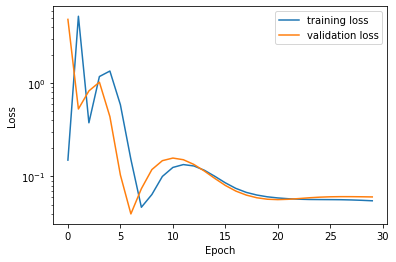

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) # now using 20 hidden units
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(smallEnergy, smallTarget, epochs=30, batch_size=256, validation_split=0.8)

plot_learning_curve(results.history)

We see that we got little improvement here. Another hyperparameter to adjust is *batch size*, which is the number of training examples used to calculate the gradient on each step. While you may initially think that a higher batch size leads to faster or more accurate training, in practice this is not true. The "noise" that arises from using less training examples at each iteration can actually help find the global minimum of the loss function.
(See here for more info: https://arxiv.org/pdf/1609.04836.pdf)

Try decreasing the batch size to 16.

Epoch 1/30
13/13 [==============================] - 0s 8ms/step - loss: 4.5691 - val_loss: 0.3942
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 0.4147 - val_loss: 0.1712
Epoch 3/30
13/13 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 0.0626
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 0.0543 - val_loss: 0.0558
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 0.0505 - val_loss: 0.0517
Epoch 6/30
13/13 [==============================] - 0s 4ms/step - loss: 0.0469 - val_loss: 0.0487
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 0.0457 - val_loss: 0.0479
Epoch 8/30
13/13 [==============================] - 0s 4ms/step - loss: 0.0442 - val_loss: 0.0456
Epoch 9/30
13/13 [==============================] - 0s 4ms/step - loss: 0.0430 - val_loss: 0.0443
Epoch 10/30
13/13 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.0414
Epoch 11/30
13/13 [

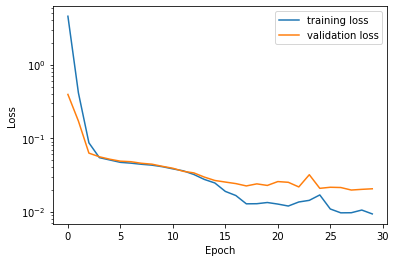

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError())
results = model.fit(smallEnergy, smallTarget, epochs=30, batch_size=16, validation_split=0.8)  # note batch size

plot_learning_curve(results.history)


This is starting to do better but has significant room for improvement.

Another hyperparameter to tune is the *learning rate*. 

 - If the learning rate is too high, we are taking too large of a step in the gradient descent at each iteration and will miss narrow minima in the loss function. 
 - If the learning rate is too small, then we are not traveling far enough in each iteration and we will take far too long to reach a minimum. 

Perhaps the learning rate is too high and the network can't fine tune. Try decreasing the learning rate to 0.001.

Epoch 1/30
13/13 [==============================] - 0s 7ms/step - loss: 5.5516 - val_loss: 3.5071
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 3.8223 - val_loss: 2.4361
Epoch 3/30
13/13 [==============================] - 0s 4ms/step - loss: 2.6218 - val_loss: 1.6703
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 1.7699 - val_loss: 1.1471
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 1.1892 - val_loss: 0.8084
Epoch 6/30
13/13 [==============================] - 0s 4ms/step - loss: 0.8104 - val_loss: 0.5878
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 0.5675 - val_loss: 0.4454
Epoch 8/30
13/13 [==============================] - 0s 4ms/step - loss: 0.4134 - val_loss: 0.3525
Epoch 9/30
13/13 [==============================] - 0s 4ms/step - loss: 0.3178 - val_loss: 0.2816
Epoch 10/30
13/13 [==============================] - 0s 4ms/step - loss: 0.2433 - val_loss: 0.2405
Epoch 11/30
13/13 [

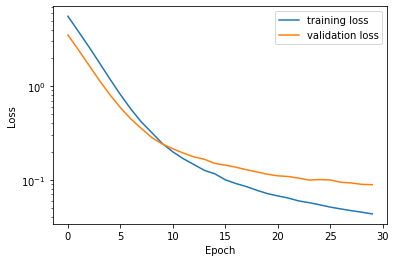

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError())  # note LR supplied to Adam
results = model.fit(smallEnergy, smallTarget, epochs=30, batch_size=16, validation_split=0.8)

plot_learning_curve(results.history)

This is not really that much better, but now there is evidence of *overtraining* or *overfitting* -- the training loss is so much lower than the validation loss. 

A common fix to this is adding *dropout layers*. Try adding a dropout layer with dropout rate of 0.5. <https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout>

You can also try batch normalization: <https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization>

Epoch 1/30
13/13 [==============================] - 0s 8ms/step - loss: 6.5036 - val_loss: 6.4795
Epoch 2/30
13/13 [==============================] - 0s 5ms/step - loss: 8.0800 - val_loss: 4.7971
Epoch 3/30
13/13 [==============================] - 0s 4ms/step - loss: 5.7415 - val_loss: 3.6087
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 4.7943 - val_loss: 2.7745
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 4.0249 - val_loss: 2.1900
Epoch 6/30
13/13 [==============================] - 0s 4ms/step - loss: 2.8858 - val_loss: 1.6748
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 3.0672 - val_loss: 1.3726
Epoch 8/30
13/13 [==============================] - 0s 4ms/step - loss: 1.7951 - val_loss: 1.0574
Epoch 9/30
13/13 [==============================] - 0s 4ms/step - loss: 2.1033 - val_loss: 0.8546
Epoch 10/30
13/13 [==============================] - 0s 4ms/step - loss: 1.4337 - val_loss: 0.6742
Epoch 11/30
13/13 [

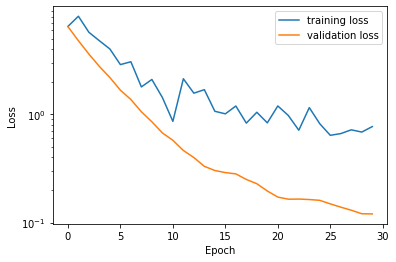

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))  # example usage of a dropout layer
# model.add(tf.keras.layers.BatchNormalization())  # uncomment if you want to use BatchNorm instead

### Note: it's generally recommended to only use one or the other (i.e., Dropout or BatchNorm), 
### and BatchNorm is a safe default

model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError())
results = model.fit(smallEnergy, smallTarget, epochs=30, batch_size=16, validation_split=0.8)

plot_learning_curve(results.history)



This clearly stopped the overtraining problem, but it still isn't training well. Now, try training on the full dataset with a more reasonable validation split of 0.2. Use a single hidden layer with 20 neurons, a learning rate of 0.001, and a batch size of 256. Just run it for 10 epochs.

Epoch 1/10
1796/1796 [==============================] - 1s 754us/step - loss: 0.1003 - val_loss: 0.0155
Epoch 2/10
1796/1796 [==============================] - 1s 754us/step - loss: 0.0125 - val_loss: 0.0098
Epoch 3/10
1796/1796 [==============================] - 1s 700us/step - loss: 0.0085 - val_loss: 0.0078
Epoch 4/10
1796/1796 [==============================] - 1s 718us/step - loss: 0.0072 - val_loss: 0.0066
Epoch 5/10
1796/1796 [==============================] - 1s 730us/step - loss: 0.0063 - val_loss: 0.0059
Epoch 6/10
1796/1796 [==============================] - 1s 747us/step - loss: 0.0057 - val_loss: 0.0054
Epoch 7/10
1796/1796 [==============================] - 1s 787us/step - loss: 0.0054 - val_loss: 0.0053
Epoch 8/10
1796/1796 [==============================] - 1s 735us/step - loss: 0.0051 - val_loss: 0.0049
Epoch 9/10
1796/1796 [==============================] - 1s 707us/step - loss: 0.0049 - val_loss: 0.0047
Epoch 10/10
1796/1796 [==============================] - 1s 714u

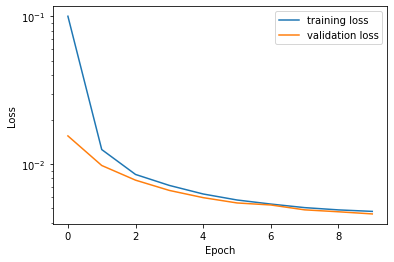

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Note: we made a decision to remove the Dropoout layer, since training on a larger dataset already has a
# regularizing effect

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError())

# larger batch sizes work better with larger datasets; note below that we're using energy and target,
# NOT smallEnery and smallTarget as with previous models.
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

This clearly resulted in a significant improvement and shows how important having a large enough dataset is. Moving on to the choice in activation functions, ReLU is not the only available choice, although it is one of the most popular ones currently. Try training a network using a sigmoid or tanh activation function.

Epoch 1/10
1796/1796 [==============================] - 1s 756us/step - loss: 0.0256 - val_loss: 0.0174
Epoch 2/10
1796/1796 [==============================] - 1s 768us/step - loss: 0.0135 - val_loss: 0.0095
Epoch 3/10
1796/1796 [==============================] - 1s 746us/step - loss: 0.0090 - val_loss: 0.0085
Epoch 4/10
1796/1796 [==============================] - 1s 763us/step - loss: 0.0082 - val_loss: 0.0078
Epoch 5/10
1796/1796 [==============================] - 1s 739us/step - loss: 0.0074 - val_loss: 0.0069
Epoch 6/10
1796/1796 [==============================] - 1s 729us/step - loss: 0.0067 - val_loss: 0.0063
Epoch 7/10
1796/1796 [==============================] - 2s 949us/step - loss: 0.0062 - val_loss: 0.0058
Epoch 8/10
1796/1796 [==============================] - 2s 873us/step - loss: 0.0058 - val_loss: 0.0055
Epoch 9/10
1796/1796 [==============================] - 1s 717us/step - loss: 0.0054 - val_loss: 0.0052
Epoch 10/10
1796/1796 [==============================] - 1s 717u

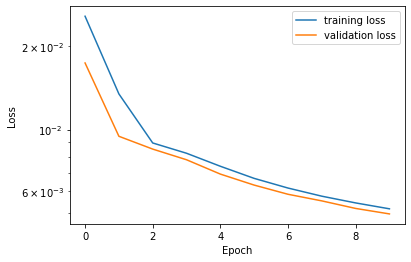

In [30]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="sigmoid"))  # note change in activation
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError())
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)


Next, try adding 2 new hidden layers to the network. Use the ReLU activation function.

Epoch 1/10
1796/1796 [==============================] - 1s 813us/step - loss: 0.0123 - val_loss: 0.0022
Epoch 2/10
1796/1796 [==============================] - 1s 787us/step - loss: 0.0016 - val_loss: 0.0011
Epoch 3/10
1796/1796 [==============================] - 1s 780us/step - loss: 9.8202e-04 - val_loss: 8.3873e-04
Epoch 4/10
1796/1796 [==============================] - 1s 778us/step - loss: 7.4002e-04 - val_loss: 6.8404e-04
Epoch 5/10
1796/1796 [==============================] - 1s 814us/step - loss: 5.9749e-04 - val_loss: 7.4859e-04
Epoch 6/10
1796/1796 [==============================] - 1s 778us/step - loss: 5.0552e-04 - val_loss: 4.5845e-04
Epoch 7/10
1796/1796 [==============================] - 1s 774us/step - loss: 4.0704e-04 - val_loss: 3.0581e-04
Epoch 8/10
1796/1796 [==============================] - 1s 781us/step - loss: 3.6020e-04 - val_loss: 3.9552e-04
Epoch 9/10
1796/1796 [==============================] - 1s 779us/step - loss: 3.3409e-04 - val_loss: 3.4690e-04
Epoch 10

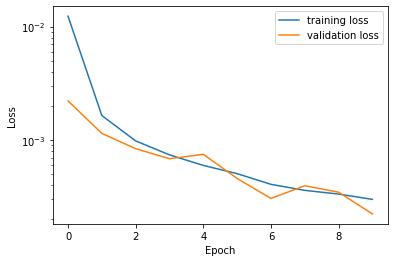

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu"))  # first hidden layer
model.add(tf.keras.layers.Dense(20, activation="relu"))                    # second hidden layer
model.add(tf.keras.layers.Dense(20, activation="relu"))                    # third hidden layer
model.add(tf.keras.layers.Dense(1))                                        # output layer

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError())
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

Clearly, adding more layers helps improve the quality of the network. There is a limit to how effective this is though. Try having 5 hidden layers.

Epoch 1/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0047 - val_loss: 9.2619e-04
Epoch 2/10
1796/1796 [==============================] - 2s 1ms/step - loss: 6.5785e-04 - val_loss: 6.0545e-04
Epoch 3/10
1796/1796 [==============================] - 2s 945us/step - loss: 5.8868e-04 - val_loss: 2.6997e-04
Epoch 4/10
1796/1796 [==============================] - 2s 927us/step - loss: 5.4815e-04 - val_loss: 3.4729e-04
Epoch 5/10
1796/1796 [==============================] - 2s 881us/step - loss: 5.6242e-04 - val_loss: 5.3746e-04
Epoch 6/10
1796/1796 [==============================] - 2s 891us/step - loss: 4.5941e-04 - val_loss: 3.0684e-04
Epoch 7/10
1796/1796 [==============================] - 2s 978us/step - loss: 5.9948e-04 - val_loss: 3.3189e-04
Epoch 8/10
1796/1796 [==============================] - 2s 928us/step - loss: 5.0302e-04 - val_loss: 2.6261e-04
Epoch 9/10
1796/1796 [==============================] - 2s 854us/step - loss: 5.1452e-04 - val_loss: 3.3534e-04


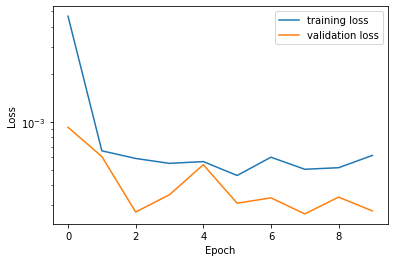

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu"))  # first hidden layer
model.add(tf.keras.layers.Dense(20, activation="relu"))                    # second hidden layer
model.add(tf.keras.layers.Dense(20, activation="relu"))                    # third hidden layer
model.add(tf.keras.layers.Dense(20, activation="relu"))                    # fourth hidden layer
model.add(tf.keras.layers.Dense(20, activation="relu"))                    # fifth hidden layer
model.add(tf.keras.layers.Dense(1))                                        # output layer

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError())
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

# at some point, diminishing returns set in and more hidden layers don't help *that* much, while just costing
# more in computation time/model size
plot_learning_curve(results.history)

Now, see what happens when you increase the number of neurons per layer from 20 to 50 in the 3 hidden layer model. Consider how they perform compared to ReLU now. 

Epoch 1/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0030 - val_loss: 9.1945e-04
Epoch 2/10
1796/1796 [==============================] - 2s 933us/step - loss: 6.9193e-04 - val_loss: 4.6202e-04
Epoch 3/10
1796/1796 [==============================] - 2s 947us/step - loss: 4.8421e-04 - val_loss: 4.1510e-04
Epoch 4/10
1796/1796 [==============================] - 2s 926us/step - loss: 4.0921e-04 - val_loss: 3.5060e-04
Epoch 5/10
1796/1796 [==============================] - 2s 923us/step - loss: 3.8629e-04 - val_loss: 2.7829e-04
Epoch 6/10
1796/1796 [==============================] - 2s 936us/step - loss: 3.5802e-04 - val_loss: 6.8086e-04
Epoch 7/10
1796/1796 [==============================] - 2s 933us/step - loss: 3.6763e-04 - val_loss: 4.0810e-04
Epoch 8/10
1796/1796 [==============================] - 2s 997us/step - loss: 3.7459e-04 - val_loss: 4.6914e-04
Epoch 9/10
1796/1796 [==============================] - 2s 933us/step - loss: 3.5946e-04 - val_loss: 9.3610e-0

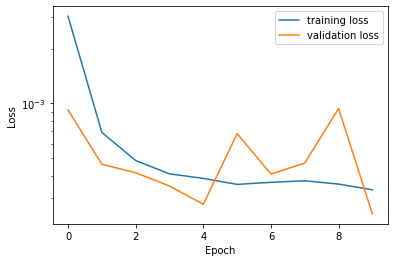

In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_shape=(5,), activation="relu"))  # first hidden layer
model.add(tf.keras.layers.Dense(50, activation="relu"))                    # second hidden layer
model.add(tf.keras.layers.Dense(50, activation="relu"))                    # third hidden layer
model.add(tf.keras.layers.Dense(1))                                        # output layer

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError())
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

Try using the sigmoid and the tanh activation functions again and compare them to ReLU.

Epoch 1/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0069 - val_loss: 0.0025
Epoch 2/10
1796/1796 [==============================] - 2s 952us/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/10
1796/1796 [==============================] - 2s 984us/step - loss: 8.5358e-04 - val_loss: 7.5552e-04
Epoch 4/10
1796/1796 [==============================] - 2s 978us/step - loss: 6.5705e-04 - val_loss: 4.4204e-04
Epoch 5/10
1796/1796 [==============================] - 2s 1ms/step - loss: 5.3661e-04 - val_loss: 4.4248e-04
Epoch 6/10
1796/1796 [==============================] - 2s 994us/step - loss: 4.7062e-04 - val_loss: 6.6178e-04
Epoch 7/10
1796/1796 [==============================] - 2s 993us/step - loss: 4.3676e-04 - val_loss: 2.7697e-04
Epoch 8/10
1796/1796 [==============================] - 2s 992us/step - loss: 4.0436e-04 - val_loss: 2.2009e-04
Epoch 9/10
1796/1796 [==============================] - 2s 965us/step - loss: 3.6654e-04 - val_loss: 2.1802e-04
Epoch 10/10


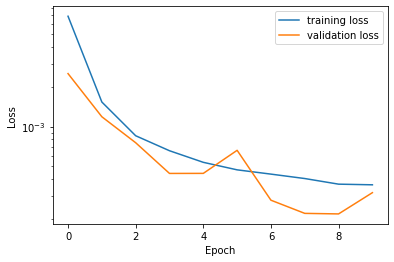

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_shape=(5,), activation="tanh"))  # first hidden layer
model.add(tf.keras.layers.Dense(50, activation="tanh"))                    # second hidden layer
model.add(tf.keras.layers.Dense(50, activation="tanh"))                    # third hidden layer
model.add(tf.keras.layers.Dense(1))                                        # output layer

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError())
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

This difference in performance, especially with the sigmoid function, is known as the vanishing gradient problem. If the value for any one the neurons gets too far away from 0, the gradient for sigmoid and tanh gets really close to 0. This means that for deeper networks it is much more difficult to update the weights in the earlier layers as their gradient is so small. Now, remove the fifth column from the input data, the charge, and see what happens when training. Why do you think including charge has such a large impact?

Epoch 1/10
1796/1796 [==============================] - 2s 1ms/step - loss: 0.0129 - val_loss: 0.0057
Epoch 2/10
1796/1796 [==============================] - 2s 930us/step - loss: 0.0050 - val_loss: 0.0041
Epoch 3/10
1796/1796 [==============================] - 2s 966us/step - loss: 0.0040 - val_loss: 0.0035
Epoch 4/10
1796/1796 [==============================] - 2s 962us/step - loss: 0.0035 - val_loss: 0.0029
Epoch 5/10
1796/1796 [==============================] - 2s 940us/step - loss: 0.0031 - val_loss: 0.0030
Epoch 6/10
1796/1796 [==============================] - 2s 935us/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/10
1796/1796 [==============================] - 2s 943us/step - loss: 0.0026 - val_loss: 0.0025
Epoch 8/10
1796/1796 [==============================] - 2s 945us/step - loss: 0.0025 - val_loss: 0.0022
Epoch 9/10
1796/1796 [==============================] - 2s 975us/step - loss: 0.0023 - val_loss: 0.0020
Epoch 10/10
1796/1796 [==============================] - 2s 931us/

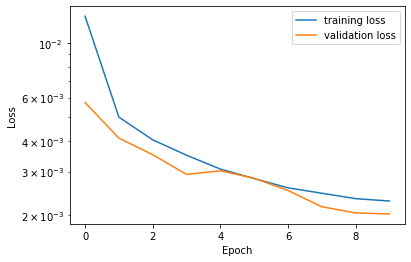

In [40]:
noCharge = energy[:,:-1]  # negative indexing is a handy trick in Python, for when it's easier to count from the
                          # right-hand end of your array

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_shape=(4,), activation="tanh"))  # note change to input shape, 
                                                                           # since we have one fewer feature
model.add(tf.keras.layers.Dense(50, activation="tanh"))                    
model.add(tf.keras.layers.Dense(50, activation="tanh"))                    
model.add(tf.keras.layers.Dense(1))                                        

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError())
results = model.fit(noCharge, target, epochs=10, batch_size=256, validation_split=0.2)  # design matrix is now 
                                                                                        # noCharge instead of energy

plot_learning_curve(results.history)

Finally, there are other options for the loss function. Try experimenting with alternatives to mean squared error.

<https://www.tensorflow.org/api_docs/python/tf/keras/losses>

You can also try some other optimizers -- for example, sgd (with and without momentum), rmsprop, adagrad, adadelta, adamax, and nadam. <https://www.tensorflow.org/api_docs/python/tf/keras/optimizers>



Epoch 1/10
1796/1796 [==============================] - 2s 889us/step - loss: 0.0911 - val_loss: 0.0696
Epoch 2/10
1796/1796 [==============================] - 2s 903us/step - loss: 0.0622 - val_loss: 0.0570
Epoch 3/10
1796/1796 [==============================] - 2s 940us/step - loss: 0.0531 - val_loss: 0.0499
Epoch 4/10
1796/1796 [==============================] - 2s 882us/step - loss: 0.0474 - val_loss: 0.0452
Epoch 5/10
1796/1796 [==============================] - 2s 881us/step - loss: 0.0432 - val_loss: 0.0413
Epoch 6/10
1796/1796 [==============================] - 2s 866us/step - loss: 0.0392 - val_loss: 0.0377
Epoch 7/10
1796/1796 [==============================] - 1s 826us/step - loss: 0.0352 - val_loss: 0.0332
Epoch 8/10
1796/1796 [==============================] - 2s 857us/step - loss: 0.0318 - val_loss: 0.0305
Epoch 9/10
1796/1796 [==============================] - 2s 841us/step - loss: 0.0296 - val_loss: 0.0293
Epoch 10/10
1796/1796 [==============================] - 2s 846u

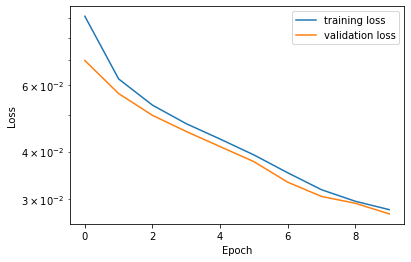

In [46]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_shape=(5,), activation="relu"))  # first hidden layer
model.add(tf.keras.layers.Dense(50, activation="relu"))                    # second hidden layer
model.add(tf.keras.layers.Dense(50, activation="relu"))                    # third hidden layer
model.add(tf.keras.layers.Dense(1))                                        # output layer

# using SGD with momentum and MAE as the loss metric instead
# note that we can't directly compare the generated learning curve to previous ones, since we are plotting a 
# different metric on the Y axis now
model.compile(tf.keras.optimizers.SGD(lr=0.001, momentum=0.01),loss=tf.keras.losses.MeanAbsoluteError())
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)